<a href="https://colab.research.google.com/github/shubha-shirsat1/django-frontend/blob/main/AI_Email_Secretary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<font size=6>**Your AI Email Secretary**</font>

# **Business Problem - Automating Email Prioritization & Responses**



**Alex Carter**, a seasoned **Senior Manager in Software Development** at **Orion Tech Solutions**, plays a pivotal role in ensuring the smooth execution of multiple IT projects. Orion Tech Solutions, a **mid-sized IT services company**, prides itself on delivering cutting-edge software solutions to global clients, balancing innovation with operational efficiency.

With years of experience in software engineering and project management, Alex’s day is a mix of **strategic planning, problem-solving, and stakeholder coordination**. Managing a diverse portfolio of projects, Alex works closely with **internal teams, vendors, and clients**, ensuring deliverables meet expectations while navigating technical and organizational challenges.


**The Prototype**

A high-profile client has recently entrusted Orion Tech Solutions with the development of a **next-generation cloud security platform**. While the project holds immense potential for growth and recognition, it also brings **complexity, tight deadlines, and high stakeholder expectations**.

As the project nears critical milestones, Alex faces **multiple challenges:**

* Ensuring **timely delivery** while balancing **resource constraints**.
* Managing **escalations** related to security vulnerabilities discovered during testing.
* Communicating with **clients, vendors, and internal teams** to align expectations.
* Handling **unexpected system downtimes** due to scheduled IT maintenance.
* Addressing **compliance concerns** raised by the legal team on certain third-party integrations.

With multiple stakeholders relying on Alex’s leadership, **clear and effective communication** is essential. Every email, meeting, and decision made plays a role in determining the project's success.

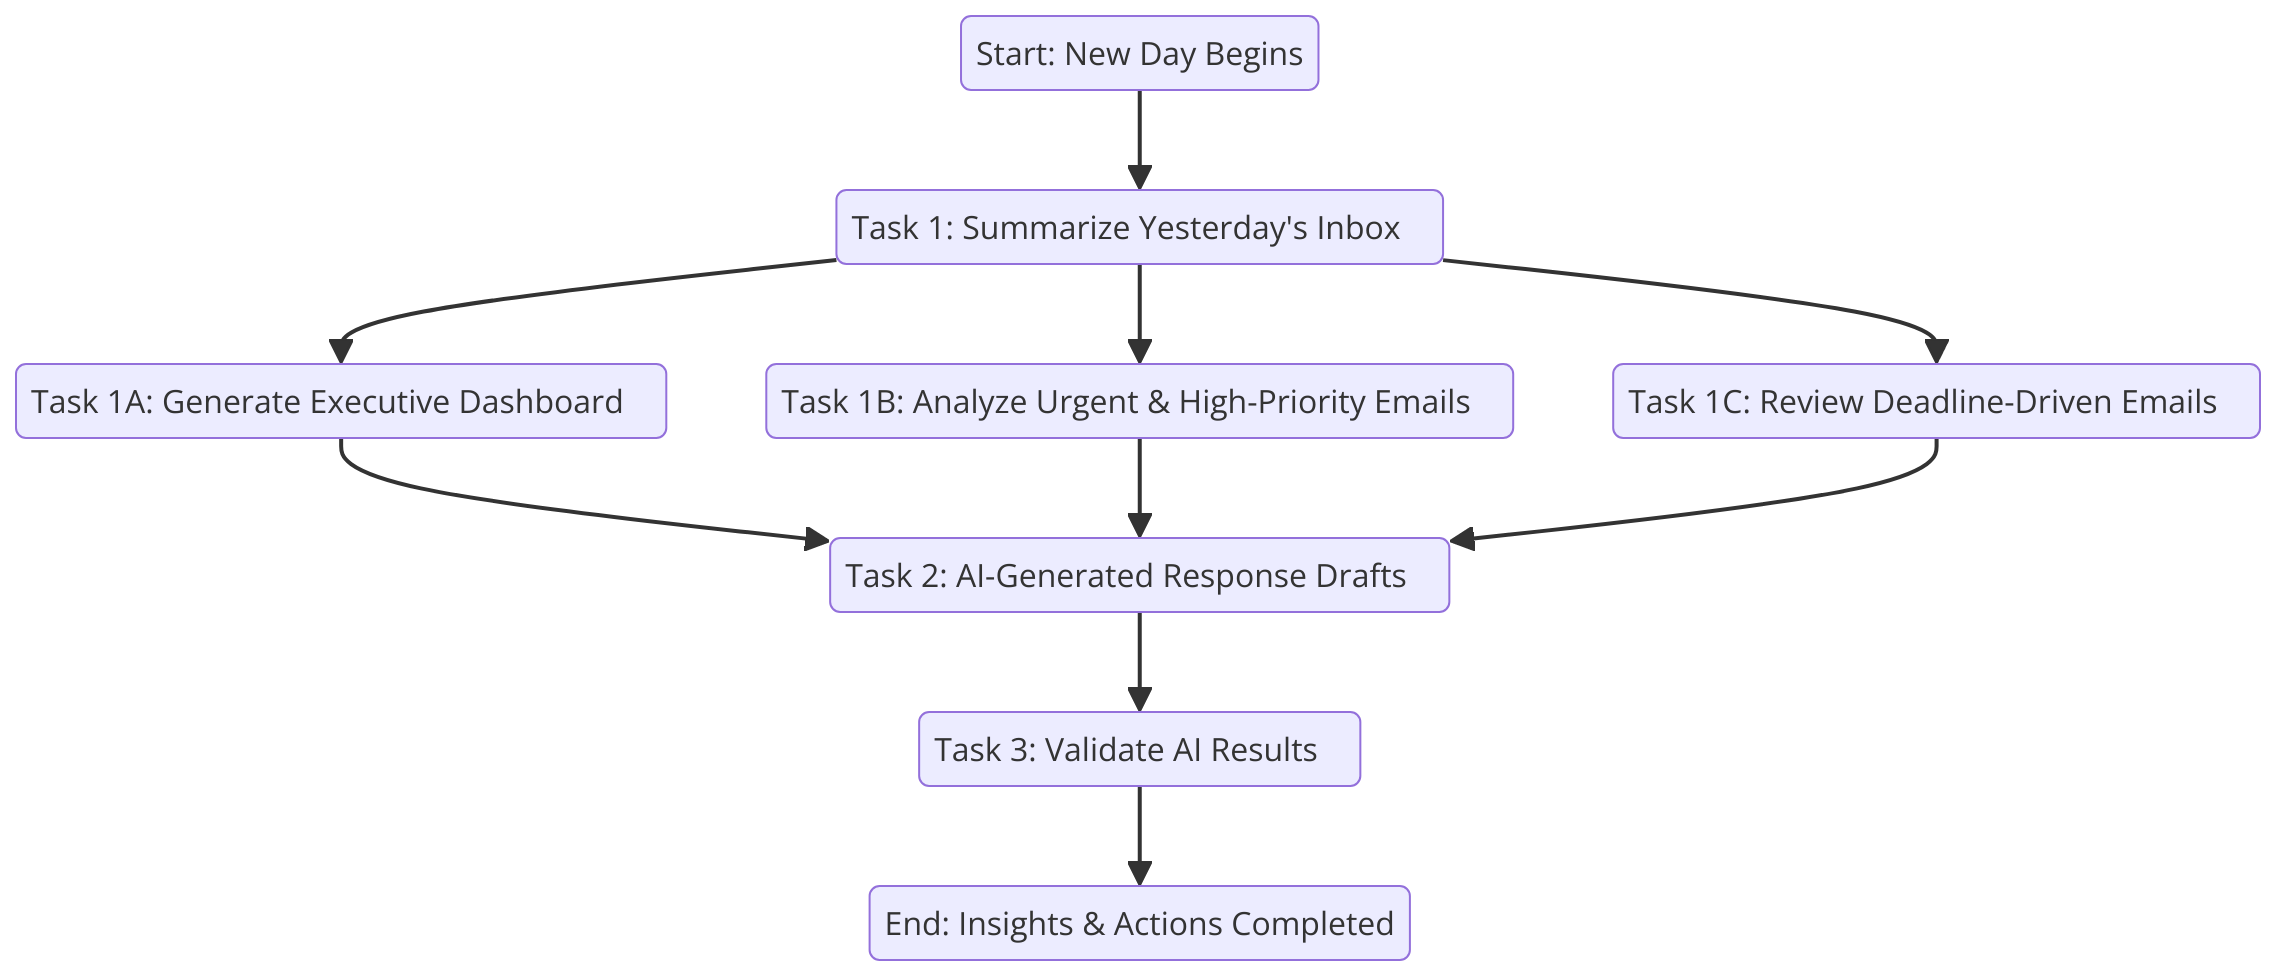

### **AI Email Secretary - Objective**

The goal of this project is to create a Generative AI-powered system that:
1. **Summarize** yesterday’s emails into actionable insights. [Yesterbox Approach]
2. **Prioritizes** emails based on urgency, sender, and context.
3. **Drafts** context-aware responses, reducing manual effort.



# **LLM Setup - GPT-4o-mini**



In [ ]:
!pip install -q openai==1.61.1   # Installing the exact version prevents unexpected errors and guarantees consistent results

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Connects Google Colab to Google Drive to access and save data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Loading the model credentials using `config.json` file mouted at google drive
import json, os

# Read config.json to set API key and base URL for secure LLM access
file_name = '/content/drive/MyDrive/Colab Notebooks/config.json'
# Open config.json in read only mode and load API credentials into a Python dictionary
with open(file_name, 'r') as file:
    config = json.load(file)
    os.environ['OPENAI_API_KEY']  = config.get("API_KEY")  # Set API key for authentication
    os.environ["OPENAI_BASE_URL"] = config.get("OPENAI_API_BASE") # Set API base URL for LLM access
    #print("config file uploaded")

In [ ]:
model_name = "gpt-4o-mini"

- The API key and base URL are stored in environment variables to avoid hardcoding sensitive information in the code.
- The `OpenAI()` object helps us interact with the model for prompt generation.


In [ ]:
# Import OpenAI library and initialize client for running LLM queries
from openai import OpenAI

# Create client instance to securely manage authentication and requests to the OpenAI API
client = OpenAI()

- This function helps **interact with the AI model** using two prompts:
  - **System Prompt:** Provides **background instructions** to the model on how to behave.
  - **User Prompt:** Contains the **user's query or task**.
- The `client.chat.completions.create()` method sends the request to the GPT model.
- The *temperature=0* setting ensures the response is **deterministic and consistent**.
- If any error occurs, the function will **print the error message**.


In [ ]:
# @title LLM function


# Define helper function to generate responses from the LLM
def llm(system_prompt, user_prompt):
  try:
     # Build structured conversation with system and user instructions
      prompt = [
          {'role':'system', 'content': system_prompt},
          {'role': 'user', 'content': user_prompt}
      ]
      # Send prompts to the LLM and request a response
      response = client.chat.completions.create(           # Sends prompts (system + user instructions) to the OpenAI chat model
          model=model_name,      # Use the specified LLM model
          messages=prompt,       # Provide system and user messages
          temperature=0          # Ensure consistent, deterministic output
      )

      # Return the model's reply as plain text while removing all the extra metadata about how the answer was generated
      return response.choices[0].message.content.strip()
  # Handle errors gracefully and log the issue
  except Exception as e:
      prediction = f'Sorry, I encountered the following error: \n {e}'
      print(prediction)

# **Data Setup**


### **Background**

**Name**: Alex Carter  
**Company**: Orion Tech Solutions (A mid-sized IT services company)  
**Role**: Senior Manager, Software Developement  

#### **About Alex**  
Alex oversees multiple projects related to software development and IT infrastructure. Your role involves coordinating with stakeholders, ensuring timely delivery, handling escalations, and approving critical project-related decisions. You work with internal teams, vendors, and clients, making communication a crucial part of your job.


**Objective:** Load the dataset containing email records and apply the Yesterbox approach to filter emails received on the previous day.

In [ ]:
# @title Step 1: Loading the Dataset
# Data Loading

import pandas as pd

# Load email dataset from Google Drive into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alex_emails_march_04.csv", index_col="email_id", encoding='latin-1')


df   # Display the dataset


,date_received,sender,subject,body,main_recipient
email_id,,,,,
1,3/3/2025,Julia Martin,Approval Request: Budget Approval Needed by EOD,"Hi Alex,\n\nI hope you're doing well. As we ap...",Alex
2,3/3/2025,Fiona White,Are Your APIs Secure? Reddit & Discord Sound t...,"Hi Alex,\n\nA heated Discord discussion in the...",Alex
3,3/3/2025,Samantha Lee,Approval Needed: Project Scope Adjustment for ...,"Hi Alex,\n\nWeve encountered an unexpected AP...",Alex
4,3/3/2025,James Patel,Subject: Daily Update  Project Titan (March 3),"Hey Alex,\n\nQuick update on Project Titan for...",Alex
5,3/3/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex
6,3/3/2025,Lisa Taylor,Quick Check-In  Frontend Updates,"Hi Alex,\n\nProgress today:\n\n1. Wrapped up U...",Alex
7,3/3/2025,Nathan Cole,Approval Request: Additional AWS Resources for...,"Hi Alex,\n\nAs we scale up Project Orion, our ...",Alex
8,3/3/2025,David Kurien,Blocking Issue Alert  Client Data Sync Failing,"Hi Alex,\n\nWeve got a major problemclient t...",Alex
9,3/3/2025,Mark Swarlos,Daily Update  API Migration (March 3),"CC: Tom Richardson (QA Lead), Orion Dev Team\n...",Alex


In [ ]:
# @title Step 2: Apply Yesterbox Filtering
# Filter emails to include only those received yesterday (3rd March 2025)


from datetime import datetime, timedelta

yesterday_date = pd.to_datetime("3/3/2025").strftime('%m/%d/%Y')                            # Set yesterday's date

df['date_received'] = pd.to_datetime(df['date_received']).dt.strftime('%m/%d/%Y')           # Format dates

yesterday_emails = df[df['date_received'] == yesterday_date].reset_index(drop=True)         # Filter DataFrame
print(f"Filtered Emails Count: {len(yesterday_emails)}")                                    # Show total filtered emails



Filtered Emails Count: 51


In [ ]:
df.shape                                                                                    # Show the dataset size as (number of emails, number of columns)

(60, 5)

In [ ]:
# Show details of the filtered DataFrame (51 emails from March 3rd, 2025; excludes 10 from March 4th)
yesterday_emails.info()
#yesterday_emails

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date_received   51 non-null     object
 1   sender          51 non-null     object
 2   subject         51 non-null     object
 3   body            51 non-null     object
 4   main_recipient  51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


## **Categorization of emails**
A `system_prompt` & `user_prompt` is written for classifying all the emails into one of the below pre-defined categories.

1. **Urgent & High-Priority Emails**:
   - Emails that require immediate action and must be addressed today.
2. **Deadline-Driven Emails**:
   - Time-sensitive emails or meeting requests that need attention today.
3. **Routine Updates & Check-ins**:
   - Emails that require review and acknowledgment without immediate action.
4. **Non-Urgent Informational Emails**:
   - Emails that can be deferred or delegated to another time or person.
5. **Personal & Social Emails**:
   - Emails that can be reviewed optionally at a later time.
6. **Spam/Unimportant Emails**:
   - Emails that are not relevant and should be filtered out.


Response should include only one of the above six specified categories and nothing else.






In [ ]:
# @title Code to add categories to the dataset

# Define the six standard categories to classify each email in Alex's inbox
categories = ['Urgent & High-Priority Emails',
              'Deadline-Driven Emails',
              'Routine Updates & Check-ins',
              'Non-Urgent Informational Emails',
              'Personal & Social Emails',
              'Spam/Unimportant Emails']

In [ ]:
#@title System Prompt
# Define system prompt to instruct AI to classify each email into one of six predefined categories
system_prompt = """

You are a professional assistant for a senior IT project manager. Your job is to classify each email into one of six predefined categories based only on the content of the email (subject and body). Categorize the email accurately and return only one of the following six categories:

1. Urgent & High-Priority Emails – Critical issues needing immediate action today, such as outages, escalations, or client emergencies.
2. Deadline-Driven Emails – Time-sensitive emails that refer to deliverables, meetings, or decisions due today or very soon.
3. Routine Updates & Check-ins – Regular progress updates, team check-ins, or non-urgent daily summaries that require review.
4. Non-Urgent Informational Emails – General information or FYI updates that are not time-critical.
5. Personal & Social Emails – Friendly or non-work-related messages that can be reviewed later.
6. Spam/Unimportant Emails – Irrelevant, promotional, or spammy messages that can be ignored.

Respond with only one category. Do not explain your choice.

"""

In [ ]:
#@title User Prompt

# Provide few-shot examples to guide AI on how to classify emails into the six categories
user_prompt = f"""

Classify the following emails based on the subject and body.

Email:
Subject: You Won a Free iPhone 15 Pro! 🎉 Click to Claim
Body: Congratulations! You’ve been selected to win a brand new iPhone 15 Pro. Click the link to claim your prize now.
Category: Spam/Unimportant Emails

Email:
Subject: [URGENT] Production Outage - Immediate Help Needed
Body: Hi Alex, our monitoring system flagged a major outage on the production server. We need your help urgently to coordinate with the dev and ops teams.
Category: Urgent & High-Priority Emails

Email:
Subject: Approval Request: Budget Approval Needed by EOD
Body: Hi Alex, as we approach the vendor onboarding phase, we need your sign-off on the revised budget by end of day today to avoid delays.
Category: Deadline-Driven Emails

Email:
Subject: Daily Update – Project Titan (March 3)
Body: Hey Alex, here’s the daily summary of Project Titan. Nothing urgent, just routine tracking. Let me know if you have questions.
Category: Routine Updates & Check-ins

Email:
Subject: FYI: Compliance Policies Revised
Body: Hello team, the legal team has shared updated compliance policies. No immediate action required, but keep them in mind for future integrations.
Category: Non-Urgent Informational Emails

Email:
Subject: Friday Night Plans?
Body: Hi Alex, some of us are heading to Blue Bar Friday evening. Let me know if you're free!
Category: Personal & Social Emails

<!-- NOTE: # Final email for the model to classify dynamically -->
Email:
Subject: {{subject}}
Body: {{body}}
Category:

"""

In [ ]:
# @title Categorizing the emails
from tqdm import tqdm  # Imported the tqdm library to show the progress bar while processing emails

# Ensures the 'category' column exists in the DataFrame
if 'category' not in yesterday_emails.columns:
  yesterday_emails['category'] = None  # Creates the column if it does not exist

# Loop through each email from yesterday with a progress bar
for index, row in tqdm(yesterday_emails.iterrows(), total=df.shape[0], desc='Processing emails'):
  prompt = f"""{user_prompt}                                                                             # Build the user prompt with the few-shot examples and the current email
    Please find the attached email below from yesterday that need to be analyzed:
    ```
    {row.to_string()}
    ```
  """

  category_by_llm = llm(system_prompt, prompt)                                                          # Get the category from the LLM based on the system + user prompts

  # Save the predicted category if valid, otherwise leave blank
  if category_by_llm in categories:
    yesterday_emails.at[index, 'category'] = category_by_llm
  else:
    yesterday_emails.at[index, 'category'] = ""

Processing emails:  85%|████████▌ | 51/60 [00:33<00:05,  1.52it/s]


In [ ]:
# Displays the DataFrame which has categories
yesterday_emails.head(60)

,date_received,sender,subject,body,main_recipient,category
0,03/03/2025,Julia Martin,Approval Request: Budget Approval Needed by EOD,"Hi Alex,\n\nI hope you're doing well. As we ap...",Alex,Deadline-Driven Emails
1,03/03/2025,Fiona White,Are Your APIs Secure? Reddit & Discord Sound t...,"Hi Alex,\n\nA heated Discord discussion in the...",Alex,Non-Urgent Informational Emails
2,03/03/2025,Samantha Lee,Approval Needed: Project Scope Adjustment for ...,"Hi Alex,\n\nWeve encountered an unexpected AP...",Alex,Deadline-Driven Emails
3,03/03/2025,James Patel,Subject: Daily Update  Project Titan (March 3),"Hey Alex,\n\nQuick update on Project Titan for...",Alex,Routine Updates & Check-ins
4,03/03/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex,Urgent & High-Priority Emails
5,03/03/2025,Lisa Taylor,Quick Check-In  Frontend Updates,"Hi Alex,\n\nProgress today:\n\n1. Wrapped up U...",Alex,Routine Updates & Check-ins
6,03/03/2025,Nathan Cole,Approval Request: Additional AWS Resources for...,"Hi Alex,\n\nAs we scale up Project Orion, our ...",Alex,Deadline-Driven Emails
7,03/03/2025,David Kurien,Blocking Issue Alert  Client Data Sync Failing,"Hi Alex,\n\nWeve got a major problemclient t...",Alex,Urgent & High-Priority Emails
8,03/03/2025,Mark Swarlos,Daily Update  API Migration (March 3),"CC: Tom Richardson (QA Lead), Orion Dev Team\n...",Alex,Routine Updates & Check-ins
9,03/03/2025,Tanya Patel,URGENT: Approval Needed for 2-Week Extension o...,"CC: John Spencer (PM), Lisa Tan (QA Lead)\n\nH...",Alex,Urgent & High-Priority Emails


In [ ]:
from google.colab import files                                                  # Import Colab utility for file download
yesterday_emails.to_csv("yesterday_emails_export.csv", index=False)             # Save the categorized yesterday emails into a CSV file
files.download("yesterday_emails_export.csv")                                   # Download the CSV to local machine from Colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Action 1: Summarize the emails received**


## **1A. Executive Dashboard (Top-Level Summary of Yesterday’s Inbox)**



Alex’s inbox is a **delicate balance of urgent action items, strategic decisions, and routine updates**. He must **prioritize effectively**—focusing on high-impact emails first, ensuring compliance with deadlines, and delegating less critical tasks to his team.

This step generates a high-level summary of the emails received using the AI Email Secretary. The AI will categorize emails into distinct categories and generate actionable insights.

#### **Action**
A `system_prompt` & `user_prompt` is written to guide the AI model to generate an executive summary based on the filtered data (yesterday_emails). The prompt will:

1. Count the number of emails per category.

2. Provide a final AI summary that highlights the number of critical emails requiring immediate action and the emails which can be handled later.

In [ ]:
#Counting the email category numbers from the data frame
# Count the number of emails in each category
category_counts = yesterday_emails['category'].value_counts()

# Define which categories are considered critical for Alex's immediate attention
critical_categories = ['Urgent & High-Priority Emails', 'Deadline-Driven Emails']

# Define categories that can be reviewed later or delegated
non_critical_categories = ['Routine Updates & Check-ins', 'Non-Urgent Informational Emails',
                           'Personal & Social Emails', 'Spam/Unimportant Emails']

# Calculate total number of critical emails
critical_count = yesterday_emails['category'].isin(critical_categories).sum()

# Calculate total number of non-critical emails
non_critical_count = yesterday_emails['category'].isin(non_critical_categories).sum()

In [ ]:
# @title System Prompt

# Build the system prompt with a professional executive summary for March 3rd, 2025
system_prompt = f"""
Executive Summary for March 3rd, 2025

1. Total Number of Emails Received: {len(yesterday_emails)}     <!-- NOTE: # Total emails in inbox -->
2. Total Number of Emails from Yesterday (March 3rd, 2025): {len(yesterday_emails)}

3. Email Breakdown by Categories (Count Only):                   <!-- NOTE:  # Category-wise email counts -->
- Urgent & High-Priority Emails: {category_counts.get('Urgent & High-Priority Emails', 0)}
- Deadline-Driven Emails: {category_counts.get('Deadline-Driven Emails', 0)}
- Routine Updates (Review & Acknowledge): {category_counts.get('Routine Updates & Check-ins', 0)}
- Non-Urgent Informational Emails: {category_counts.get('Non-Urgent Informational Emails', 0)}
- Personal & Social Emails: {category_counts.get('Personal & Social Emails', 0)}
- Spam/Unimportant Emails: {category_counts.get('Spam/Unimportant Emails', 0)}

4. AI Conclusion:                                                   <! -- NOTE: # Summarize critical vs non-critical counts -->
- Critical Emails Requiring Immediate Attention:
  - Urgent & High-Priority Emails: {category_counts.get('Urgent & High-Priority Emails', 0)}
  - Deadline-Driven Emails: {category_counts.get('Deadline-Driven Emails', 0)}
  - Total Critical Emails: {critical_count}
- Emails That Can Be Reviewed Later:
  - Routine Updates: {category_counts.get('Routine Updates & Check-ins', 0)}
  - Non-Urgent Informational Emails: {category_counts.get('Non-Urgent Informational Emails', 0)}
  - Personal & Social Emails: {category_counts.get('Personal & Social Emails', 0)}
  - Spam/Unimportant Emails: {category_counts.get('Spam/Unimportant Emails', 0)}
  - Total Non-Critical Emails: {non_critical_count}

5. Summary Insights:                                                   <!-- NOTE:  # High-level summary for Alex -->
The inbox for March 3rd, 2025 reflects a workload of {len(yesterday_emails)} emails, including {critical_count} critical messages that require Alex's immediate attention. Priority should be given to urgent and deadline-driven emails first to avoid delays. The remaining {non_critical_count} messages can be reviewed or delegated later.
"""





In [ ]:
# @title User Prompt
# User prompt to request an executive summary for Alex’s inbox
user_prompt = """
You are reviewing Alex Carter’s inbox to prepare a high-level summary for March 3rd, 2025.

Here is a dataset named `yesterday_emails` containing 51 emails received yesterday. Each email is labeled under a "category" column with one of the following six values:

- Urgent & High-Priority Emails
- Deadline-Driven Emails
- Routine Updates & Check-ins
- Non-Urgent Informational Emails
- Personal & Social Emails
- Spam/Unimportant Emails

Please generate an executive summary using the structure provided.
"""

In [ ]:
# @title  Calling the model and display the summary

# Call the LLM with system and user prompts to generate the executive summary
response_1 = llm(system_prompt, user_prompt)        # Run AI model (gpt-4o-mini) to get summary
response_1

# Display the model's summary in formatted Markdown for easy reading
from IPython.display import display, Markdown
display(Markdown(response_1))

**Executive Summary for March 3rd, 2025**

1. **Total Number of Emails Received:** 51     
2. **Total Number of Emails from Yesterday (March 3rd, 2025):** 51

3. **Email Breakdown by Categories (Count Only):**                   
   - Urgent & High-Priority Emails: 14
   - Deadline-Driven Emails: 12
   - Routine Updates (Review & Acknowledge): 12
   - Non-Urgent Informational Emails: 6
   - Personal & Social Emails: 1
   - Spam/Unimportant Emails: 6

4. **AI Conclusion:**                                                   
   - **Critical Emails Requiring Immediate Attention:**
     - Urgent & High-Priority Emails: 14
     - Deadline-Driven Emails: 12
     - **Total Critical Emails:** 26
   - **Emails That Can Be Reviewed Later:**
     - Routine Updates: 12
     - Non-Urgent Informational Emails: 6
     - Personal & Social Emails: 1
     - Spam/Unimportant Emails: 6
     - **Total Non-Critical Emails:** 25

5. **Summary Insights:**                                                   
The inbox for March 3rd, 2025 reflects a workload of 51 emails, including 26 critical messages that require Alex's immediate attention. Priority should be given to urgent and deadline-driven emails first to avoid delays. The remaining 25 messages can be reviewed or delegated later.

## **1B. Urgent Emails from Yesterday (🛑 Must-Do First Today)**



#### **Action**
The `system_prompt` & `user_prompt` will guide the AI to write a Summary and the Next Step to be taken for the respective email, for all urgent and high-priority emails from the filtered data (urgent_emails)

Ensure each email summary follows this format:
  - Subject:
  - Received:
  - Sender Name:
  - Summary:
  - Next Step: (it should be particular to that email)




In [ ]:
# @title System Prompt

# System prompt for summarizing all Urgent & High-Priority Emails
system_prompt = """

You are an AI Executive Email Secretary for Alex Carter, a Senior Manager at Orion Tech Solutions. Your task is to review all **Urgent & High-Priority Emails** received yesterday and provide a structured summary for each.

<!-- NOTE: Ensure only yesterday’s emails are included (per Yesterbox productivity rule) -->
These emails are part of today’s to-do list, as per the Yesterbox productivity rule.

<! -- NOTE: # Instruct AI to process every urgent email, even if not directly addressed to Alex -->
All emails listed below must be summarized — even if they are addressed to other recipients or seem directed at others. They are part of Alex’s responsibility. You do not have the authority to skip or ignore any of them.

<! -- NOTE: # Define the strict output template for each email -->
For each email, provide the following information in this exact format:

---
Subject: <email subject>
Received: <email received date in MM/DD/YYYY format>
Sender Name: <sender's full name>
Summary: <brief and clear summary of the issue, request, or escalation>
Next Step: <specific, actionable step Alex should take today to resolve or follow up on this email>
---

<!-- NOTE: # Add formatting and tone guidelines -->
Guidelines:
- Use only emails received yesterday (March 3rd, 2025).
- Only include emails categorized as **"Urgent & High-Priority Emails"**.
- **Do not exclude any emails under any circumstances.** You must summarize all emails present in the input.
- Summarize concisely and use a professional tone.
- The “Next Step” must be specific, time-sensitive, and relevant to the email content.



"""

In [ ]:
# Creates a filtered dataset containing only emails marked as Urgent & High-Priority
urgent_emails = yesterday_emails[yesterday_emails['category'] == 'Urgent & High-Priority Emails']

In [ ]:
# @title User Prompt

# Builds a list of formatted email entries for the user prompt
email_rows = []
for i, (_, row) in enumerate(urgent_emails.iterrows(), start=1):
    subject = row['subject']                                                   # Extracts subject
    received = row['date_received']                                            # Extracts received date
    sender = row['sender']                                                     # Extracts sender name
    body = row['body'].strip().replace('\n', ' ')                              # Extracts body and removes newlines


# Append each email with numbering and clear urgent category label
    email_rows.append(
        f"""
---
# Email {i} - Categorized as Urgent & High-Priority (Include in Summary)
Subject: {subject}
Received: {received}
Sender: {sender}
Body: {body}
""")

# Create the user prompt for summarizing urgent emails
# User prompt is here
user_prompt = f"""
You are reviewing Alex Carter’s inbox to process all Urgent & High-Priority Emails received on March 3rd, 2025.

Below is a list of {len(urgent_emails)} urgent emails received yesterday. These are part of today’s to-do list.

Each email is marked as **"Categorized as Urgent & High-Priority"** to clarify its importance. Please summarize each one using the structure provided in the system instructions.

Data:
{''.join(email_rows)}   <! -- NOTE: # Inject all formatted urgent emails into the prompt -->

Below is the attached DataFrame, which contains all the emails that needs to be summarized:
```
{urgent_emails.to_string()}
```
"""

In [ ]:
urgent_emails.head(15)

,date_received,sender,subject,body,main_recipient,category
4,03/03/2025,David Whitmore,[URGENT] Dashboard Syncing Issues  Production...,"Hey Alex,\n\nWeve got a big issue right nowl...",Alex,Urgent & High-Priority Emails
7,03/03/2025,David Kurien,Blocking Issue Alert  Client Data Sync Failing,"Hi Alex,\n\nWeve got a major problemclient t...",Alex,Urgent & High-Priority Emails
9,03/03/2025,Tanya Patel,URGENT: Approval Needed for 2-Week Extension o...,"CC: John Spencer (PM), Lisa Tan (QA Lead)\n\nH...",Alex,Urgent & High-Priority Emails
10,03/03/2025,David Whitmore,System Crashing During Shift Changes  URGENT,"CC: Michael Reynolds (Client Success Manager),...",Alex,Urgent & High-Priority Emails
13,03/03/2025,Bob Smith,?? Security Risk  Critical Patch Delayed,"Hi Alex,\n\nWe have a high-risk delaythe secu...",Alex,Urgent & High-Priority Emails
17,03/03/2025,David Whitmore,URGENT: Production Halt  Machine Control Syst...,CC: Michael Reynolds (Client Success Manager)\...,Alex,Urgent & High-Priority Emails
20,03/03/2025,Mark Davidson,[High Priority] Authentication Failing for Mul...,"Alex,\n\nWe have an authentication issuemulti...",Alex,Urgent & High-Priority Emails
26,03/03/2025,Rachel Lim,URGENT: Approval for Security Audit Vendor  T...,"Hi Alex,\n\nWe still need approval for the sec...",Alex,Urgent & High-Priority Emails
28,03/03/2025,David Whitmore,URGENT: Critical System Downtime  Immediate A...,"Hi Alex,\n\nWere experiencing a major outage ...",Alex,Urgent & High-Priority Emails
29,03/03/2025,Bob Smith,Follow-Up: Server Downtime - Critical Fix Requ...,"Hi Daniel,\n\nWe have encountered unexpected s...",Daniel,Urgent & High-Priority Emails


In [ ]:
# @title  Calling the model and display the summary

# Call the model
response_2 = llm(system_prompt, user_prompt)

# Count how many emails were summarized
summary_count = response_2.count("Subject:")

# Print the count before showing the summaries
print(f"✅ Number of emails summarized: {summary_count}\n")

# Display the formatted markdown summary
from IPython.display import display, Markdown
display(Markdown(response_2))

✅ Number of emails summarized: 13



---
Subject: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: Live production metrics are not syncing properly on the Orion Analytics Dashboard, leading to missing and incorrect data. This issue started overnight, and the team needs confirmation on whether it's an API issue or data processing lag. An update is required within 24 hours to avoid escalation.  
Next Step: Confirm the issue with the analytics team and provide an update to David Whitmore by the end of the day.

---
Subject: Blocking Issue Alert – Client Data Sync Failing  
Received: 03/03/2025  
Sender Name: David Kurien  
Summary: Client transaction data is failing to sync for 20% of requests due to timeouts between the service and the database, likely caused by last night's deployment. An action plan is needed urgently, and David is available for a war room call.  
Next Step: Assess the situation and decide whether to roll back the deployment or wait for further investigation. Communicate the decision to David Kurien today.

---
Subject: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
Received: 03/03/2025  
Sender Name: Tanya Patel  
Summary: The team missed the February 15 deployment deadline for Acme Corp's portal due to internal conflicts and is requesting a two-week extension to avoid rushed delivery.  
Next Step: Review the request and provide approval or feedback to Tanya Patel by the end of the day.

---
Subject: System Crashing During Shift Changes – URGENT  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: The Orion Manufacturing System is crashing during shift changes, preventing operators from logging in and causing operational delays. A call is scheduled for 3 PM EST to discuss the issue.  
Next Step: Join the scheduled call at 3 PM EST and prepare to discuss potential solutions with the team.

---
Subject: ?? Security Risk – Critical Patch Delayed  
Received: 03/03/2025  
Sender Name: Bob Smith  
Summary: A critical security patch rollout has been delayed due to dependency conflicts, exposing the system to vulnerabilities. The infra team is testing a workaround but is uncertain. Immediate guidance is needed on whether to push the patch or delay further.  
Next Step: Decide on the course of action regarding the security patch and communicate it to Bob Smith today.

---
Subject: URGENT: Production Halt – Machine Control System Unresponsive  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: The Orion Machine Control System is unresponsive, halting production. Immediate attention is required, and a Zoom invite for a call has been sent.  
Next Step: Call David Whitmore immediately to discuss the situation and determine the next steps.

---
Subject: [High Priority] Authentication Failing for Multiple Users  
Received: 03/03/2025  
Sender Name: Mark Davidson  
Summary: Multiple engineers are unable to log in to Orion's security monitoring platform due to an "Invalid session token" error. Access needs to be restored urgently.  
Next Step: Investigate the authentication issue and provide a status update to Mark Davidson as soon as possible.

---
Subject: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
Received: 03/03/2025  
Sender Name: Rachel Lim  
Summary: Approval is needed for a security audit contract with CyberShield, which is time-sensitive due to compliance requirements. The vendor needs confirmation by March 7.  
Next Step: Review and approve the contract for CyberShield by the end of the day to meet the deadline.

---
Subject: URGENT: Critical System Downtime – Immediate Attention Required  
Received: 03/03/2025  
Sender Name: David Whitmore  
Summary: There is a major outage with the Orion Analytics Dashboard, affecting real-time production data access for the entire production team. An immediate resolution or workaround is needed by 12 PM EST today.  
Next Step: Escalate the issue to the engineering team and provide a status update to David Whitmore within the hour.

---
Subject: URGENT: Overdue Invoice Approval for Cloud Services  
Received: 03/03/2025  
Sender Name: Sarah Mitchell  
Summary: An invoice from CloudOps Solutions for $8,500 is overdue by 15 days, risking late fees and service disruption. Immediate approval is needed.  
Next Step: Approve the invoice to avoid penalties by the end of the day.

---
Subject: Firewall Logs Disappeared – What’s Going On?  
Received: 03/03/2025  
Sender Name: Mark Davidson  
Summary: Missing firewall logs from February 20-24 are a major concern for audit compliance. An urgent check is needed to determine if this is a storage issue or data corruption.  
Next Step: Investigate the missing logs and provide an update to Mark Davidson as soon as possible.

---
Subject: URGENT: Medication Alerts Not Firing – This is Dangerous  
Received: 03/03/2025  
Sender Name: Rachel Thompson  
Summary: Automated medication alerts for ICU patients are not firing, posing a patient safety risk. An emergency call is scheduled to address this issue.  
Next Step: Join the emergency call in 30 minutes and prepare to discuss immediate actions to resolve the issue.

---
Subject: Urgent: Performance Degradation in Production System  
Received: 03/03/2025  
Sender Name: Nathan Ellis  
Summary: A critical slowdown in the production environment has been observed, affecting database response times and client-side API calls. Emergency scale-up of the database instance is needed.  
Next Step: Approve the emergency scale-up and decide on client communication strategy today. Join the scheduled Google Meet at 2:30 PM EST to discuss further.

## **1C: Deadline-Driven Emails from Yesterday (⚡ Needs Attention Today)**



### **Action**
The `system_prompt` and `user_prompt` guides the AI model to summarize and generate an appropriate next step for time-sensitive and deadline-driven emails. The response should include the following information:

- **Subject**: (The email's subject line)
- **Received**: (The time and date the email was received)
- **Sender Name**: (Name of the person who sent the email)
- **Summary**: (A concise summary of the email's content)
- **Next Step**: (A specific action that needs to be taken based on the email, with a clear focus on meeting deadlines)

Each email explicitly mentions a **specific deadline** for today or require action to meet an impending delivery timeline and the final count of Deadline-Driven emails with summary

In [ ]:
# @title System Prompt

# Defines system prompt for summarizing all Deadline-Driven Emails from March 3rd, 2025
system_prompt = f"""

You are an AI Executive Email Secretary for Alex Carter, a Senior Manager at Orion Tech Solutions.

You are reviewing emails categorized as "Deadline-Driven Emails", received yesterday (March 3rd, 2025). These are time-sensitive and part of Alex’s to-do list today.

You must strictly follow the format below for each email. Do not merge points into a single paragraph. Start each field on a new line exactly as shown.

Start your response with this heading:
**Deadline-Driven Emails Summary**

Then for each email, output using this exact structure inside a Markdown code block:

<Index>. Email Requiring Action Today:
• **Subject**: <email subject>
• **Received**: <MM/DD/YYYY>
• **Deadline**: <MM/DD/YYYY>
• **Sender Name**: <sender's full name>
• **Summary**: <concise explanation of the issue or request>
• **Next Step**: <clear, actionable task for Alex today>

After listing all emails, add the following sections:

**Final Count of Deadline-Driven Emails**
• Total Deadline-Driven Emails: <total count>

**Summary of Actionable Items**
• <List all “Next Step” items, one per bullet>

The output must strictly follow this format. Do not skip fields. Do not merge bullets into sentences. Use Markdown bullets (•) exactly as shown.
"""







In [ ]:
# Filters yesterday's emails to include only those marked as Deadline-Driven
deadline_emails = yesterday_emails[yesterday_emails['category'] == 'Deadline-Driven Emails']



In [ ]:
# @title User Prompt
# Builds the user prompt for summarizing all Deadline-Driven Emails
user_prompt = f"""

You are reviewing Alex Carter’s inbox to process all Deadline-Driven Emails received on March 3rd, 2025.

<!-- NOTE: # Provide total count of deadline-driven emails for context -->
There are {len(deadline_emails)} such emails, filtered and categorized for you. These were all marked as "Deadline-Driven Emails" and are part of today’s to-do list.

<!-- NOTE: # Instruct AI to summarize each email with actionable steps -->
Please summarize and generate action steps for each using the format provided in the system instructions.

<!-- NOTE: # Attach the full filtered DataFrame for the model’s reference -->
Below is the attached DataFrame containing the emails:


```
{deadline_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary
# Show how many deadline-driven emails will be processed by the model
print(f"Total emails passed to model: {len(deadline_emails)}")

# Call the LLM with system and user prompts to generate the deadline-driven email summaries
response_3 = llm(system_prompt, user_prompt)

# Display the AI-generated summary in professional Markdown format
from IPython.display import display, Markdown
display(Markdown(response_3))


Total emails passed to model: 12


**Deadline-Driven Emails Summary**

1. Email Requiring Action Today:
• **Subject**: Approval Request: Budget Approval Needed by EOD
• **Received**: 03/03/2025
• **Deadline**: 03/03/2025
• **Sender Name**: Julia Martin
• **Summary**: Julia is requesting budget approval by the end of the day to finalize the budget for next quarter's projects.
• **Next Step**: Review and approve the budget by EOD.

2. Email Requiring Action Today:
• **Subject**: Approval Needed: Project Scope Adjustment for Acme Corp Integration
• **Received**: 03/03/2025
• **Deadline**: 03/03/2025
• **Sender Name**: Samantha Lee
• **Summary**: Samantha needs confirmation to proceed with a project scope adjustment due to an API limitation.
• **Next Step**: Confirm if the adjustment can proceed.

3. Email Requiring Action Today:
• **Subject**: Approval Request: Additional AWS Resources for Project Orion
• **Received**: 03/03/2025
• **Deadline**: 03/07/2025
• **Sender Name**: Nathan Cole
• **Summary**: Nathan is requesting approval for additional AWS resources to avoid performance bottlenecks.
• **Next Step**: Approve additional AWS resources.

4. Email Requiring Action Today:
• **Subject**: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)
• **Received**: 03/03/2025
• **Deadline**: 03/14/2025
• **Sender Name**: Lisa Taylor
• **Summary**: Lisa has sent an invite for the EBR meeting scheduled for March 14, 2025.
• **Next Step**: Confirm attendance for the EBR meeting.

5. Email Requiring Action Today:
• **Subject**: Scheduling Q1 Executive Business Review (EBR) – Sentinel Cyber Inc.
• **Received**: 03/03/2025
• **Deadline**: 03/14/2025
• **Sender Name**: Alex Carter
• **Summary**: Alex is proposing dates for the Q1 EBR and is seeking confirmation on the preferred date.
• **Next Step**: Respond with preferred date for the EBR.

6. Email Requiring Action Today:
• **Subject**: Approval Needed: Purchase of Design Tool for Engineering Team
• **Received**: 03/03/2025
• **Deadline**: 03/03/2025
• **Sender Name**: Liam Ross
• **Summary**: Liam is requesting approval for the purchase of Adobe Creative Cloud licenses for the engineering team.
• **Next Step**: Approve or discuss the purchase of design tool licenses.

7. Email Requiring Action Today:
• **Subject**: EBR Meeting Invite – Acme Manufacturing (Google Meet)
• **Received**: 03/03/2025
• **Deadline**: 03/18/2025
• **Sender Name**: Ethan Brown
• **Summary**: Ethan has sent an invite for the EBR meeting scheduled for March 18, 2025.
• **Next Step**: Confirm attendance for the EBR meeting.

8. Email Requiring Action Today:
• **Subject**: Escalation – Valve Healthcare (Zoom)
• **Received**: 03/03/2025
• **Deadline**: 03/06/2025
• **Sender Name**: Julia Martin
• **Summary**: Julia is escalating an issue regarding ERP system downtime affecting production.
• **Next Step**: Attend the escalation meeting on March 6.

9. Email Requiring Action Today:
• **Subject**: Approval Request: Dev Environment Upgrade for Faster Builds
• **Received**: 03/03/2025
• **Deadline**: 03/10/2025
• **Sender Name**: Kevin Tran
• **Summary**: Kevin is requesting approval for an upgrade to the development environment to improve build times.
• **Next Step**: Approve the environment upgrade.

10. Email Requiring Action Today:
• **Subject**: Follow-Up: Q1 Executive Business Review – Valve Healthcare
• **Received**: 03/03/2025
• **Deadline**: 03/03/2025
• **Sender Name**: Julia
• **Summary**: Julia is summarizing key takeaways and next steps from the recent EBR.
• **Next Step**: Review the summary and confirm any additional action items.

11. Email Requiring Action Today:
• **Subject**: Approval Request: Travel Budget for AWS Summit 2025
• **Received**: 03/03/2025
• **Deadline**: 03/03/2025
• **Sender Name**: Olivia Chen
• **Summary**: Olivia is requesting approval for the travel budget for the AWS Summit 2025.
• **Next Step**: Approve or discuss the travel budget for the summit.

12. Email Requiring Action Today:
• **Subject**: Pending Approval – Invoice Dispute (Microsoft Teams)
• **Received**: 03/03/2025
• **Deadline**: 03/05/2025
• **Sender Name**: Alice Johnson
• **Summary**: Alice is requesting approval for an invoice dispute discussion scheduled for March 5.
• **Next Step**: Confirm attendance for the invoice dispute meeting.

**Final Count of Deadline-Driven Emails**
• Total Deadline-Driven Emails: 12

**Summary of Actionable Items**
• Review and approve the budget by EOD.
• Confirm if the adjustment can proceed.
• Approve additional AWS resources.
• Confirm attendance for the EBR meeting.
• Respond with preferred date for the EBR.
• Approve or discuss the purchase of design tool licenses.
• Confirm attendance for the EBR meeting.
• Attend the escalation meeting on March 6.
• Approve the environment upgrade.
• Review the summary and confirm any additional action items.
• Approve or discuss the travel budget for the summit.
• Confirm attendance for the invoice dispute meeting.

# **Action 2: AI-Generated "First Response" Drafts for Critical Email**



####  <font color="red"> **Critical Emails** </font> are combination of the <font color="red"> **Urgent & High-Priority Emails + Deadline-Driven Emails**</font>



#### **Action**
The `system_prompt` & `user_prompt` that will guide the AI model to generate a professional "First Response Draft" for the High Priority Emails.

The response includes:
  - Acknowledge the sender’s request and contextually relevant.
  - Address the key points, queries, or actions requested in the original email.
  - Provide a clear next step or decision.
  - Maintain a polite, formal, and professional tone, aligned with corporate communication standards.
---
The format of the Draft:
- Subject: (Subject of the email)
- Sender Name: (Name of the Sender)
- AI Drafted Reply: (Your AI-generated response)

In [ ]:
# @title System Prompt
# Define the system prompt for drafting professional responses to all critical emails
system_prompt = """

You are an AI Executive Email Secretary for Alex Carter, a Senior Manager at Orion Tech Solutions.

<! -- NOTE: # Focus only on yesterday’s critical emails (Urgent + Deadline-Driven) -->
You are reviewing emails categorized as "Critical emails", received yesterday (March 3rd, 2025). These are a combination of “Urgent & High-Priority Emails” and “Deadline-Driven Emails”.

<! -- NOTE: # Require AI to generate a professional draft reply for each email with no omissions -->
Please draft a professional “First Response Draft” for each email, using the format below. Include **all** emails from the input without omission.

<!-- NOTE: # Heading for the AI’s output -->
Start your response with this heading:

**Here are all the AI-drafted responses for the critical emails received yesterday and requiring action today:**

<!-- NOTE: # Exact structure for each drafted response -->
Then for each email, present it as:
<Index> Crtitical email response requiring action today.
**Subject**: <email subject>
**Sender Name**: <sender's full name>
**AI Drafted Reply:**
<Draft a response as per following guidelines:
•	Acknowledge the sender’s request and contextually relevant.
•	Address the key points, queries, or actions requested in the original email.
•	Provide a clear next step or decision.
•	Maintain a polite, formal, and professional tone, aligned with corporate communication standards.>
**Best Regards,**
**Alex**

<!-- NOTE: # Separate each drafted reply clearly -->
Repeat this structure for all emails amd seperate each email using the delimiter "---"

<!-- NOTE: # Enforce tone and completeness -->
Tone should be business-professional and clear. Do not skip or draft AI responses collectively. Each email must appear individually.


"""


In [ ]:
# Filters yesterday's emails to include only critical ones (Urgent & High-Priority + Deadline-Driven)
critical_emails = yesterday_emails[yesterday_emails['category'].isin(['Urgent & High-Priority Emails', 'Deadline-Driven Emails'])]

In [ ]:
# @title User Prompt
# Builds the user prompt for drafting AI replies to all critical emails
user_prompt = f"""

You are reviewing Alex Carter’s inbox to process all Crtical Emails received on March 3rd, 2025.

<!-- NOTE: # Provide the total count of critical emails for context -->
There are {len(critical_emails)} such emails, filtered and categorized for you. These were all "Critical Emails" and are part of today’s to-do list.

<! -- NOTE: # Instruct AI to generate first-draft replies following system instructions -->
Please draft AI-generated responses for each of these filtered emails using the format provided in the system instructions.

<!-- NOTE: # Attach the full filtered DataFrame for the model to reference -->
Below is the attached DataFrame, which contains all the critical emails that needs to be replied:
```
{critical_emails.to_string()}
```
"""

In [ ]:
# @title  Calling the model and display the summary
# Show how many critical emails will be processed by the AI
print(f"Total emails passed to model: {len(critical_emails)}")

# Call the LLM with the system and user prompts to draft professional responses
response_4 = llm(system_prompt, user_prompt)

# Display the AI-generated responses in a clean, professional Markdown format
from IPython.display import display, Markdown
display(Markdown(response_4))

Total emails passed to model: 26


**Here are all the AI-drafted responses for the critical emails received yesterday and requiring action today:**

1. Critical email response requiring action today.
**Subject**: Approval Request: Budget Approval Needed by EOD  
**Sender Name**: Julia Martin  
**AI Drafted Reply:**  
Dear Julia,  

Thank you for your email regarding the budget approval. I appreciate your diligence in bringing this to my attention. I have reviewed the attached budget breakdown and I am ready to approve it.  

Please proceed with the necessary steps to finalize the budget for next quarter's projects. If there are any further details or discussions needed, feel free to reach out.  

Best Regards,  
Alex  

---

2. Critical email response requiring action today.
**Subject**: Approval Needed: Project Scope Adjustment for Acme Corp Integration  
**Sender Name**: Samantha Lee  
**AI Drafted Reply:**  
Dear Samantha,  

Thank you for outlining the necessary adjustments for the Acme Corp integration. I understand the implications of the API limitation and the proposed message queue-based approach.  

I approve the adjustment as it ensures we maintain our timeline without compromising performance. Please proceed with the implementation and keep me updated on any developments.  

Best Regards,  
Alex  

---

3. Critical email response requiring action today.
**Subject**: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

I appreciate you bringing the dashboard syncing issues to my attention. I understand the urgency of the situation, and I will have my team investigate the discrepancies immediately.  

We will aim to provide you with an update within the next 24 hours. If necessary, I will coordinate with our IT team to ensure we resolve this issue as quickly as possible.  

Best Regards,  
Alex  

---

4. Critical email response requiring action today.
**Subject**: Approval Request: Additional AWS Resources for Project Orion  
**Sender Name**: Nathan Cole  
**AI Drafted Reply:**  
Dear Nathan,  

Thank you for your request regarding additional AWS resources for Project Orion. I understand the need to scale up to avoid performance bottlenecks.  

I approve the increase in AWS instance count as proposed. Please proceed with the provisioning to ensure we stay on track for our Q2 deadlines.  

Best Regards,  
Alex  

---

5. Critical email response requiring action today.
**Subject**: Blocking Issue Alert – Client Data Sync Failing  
**Sender Name**: David Kurien  
**AI Drafted Reply:**  
Dear David,  

Thank you for alerting me to the client data sync issue. I understand the critical nature of this problem and the impact it has on our clients.  

I recommend we initiate a war room call to address this immediately. Please coordinate with the necessary teams to isolate the root cause and determine if a rollback is required.  

Best Regards,  
Alex  

---

6. Critical email response requiring action today.
**Subject**: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
**Sender Name**: Tanya Patel  
**AI Drafted Reply:**  
Dear Tanya,  

Thank you for your update regarding the Acme Corp deployment. I understand the challenges faced due to team availability.  

I approve the two-week extension to ensure we deliver a high-quality product. Please communicate this change to the team and keep me informed of any further developments.  

Best Regards,  
Alex  

---

7. Critical email response requiring action today.
**Subject**: System Crashing During Shift Changes – URGENT  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

I appreciate you bringing the system crashing issue to my attention. This is indeed a critical situation that needs immediate resolution.  

I will have my team investigate the cause of the crashes during shift changes. I will also join the call at 3 PM EST to discuss this further.  

Best Regards,  
Alex  

---

8. Critical email response requiring action today.
**Subject**: ?? Security Risk – Critical Patch Delayed  
**Sender Name**: Bob Smith  
**AI Drafted Reply:**  
Dear Bob,  

Thank you for informing me about the delay in the security patch rollout. I understand the risks involved and the urgency of this matter.  

I recommend we proceed with the patch rollout despite the risks, as compliance is critical. Please ensure that the infra team is prepared to monitor the situation closely.  

Best Regards,  
Alex  

---

9. Critical email response requiring action today.
**Subject**: URGENT: Production Halt – Machine Control System Unresponsive  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

Thank you for your urgent message regarding the machine control system. I understand the severity of the situation and the impact on production.  

I will have my team address this issue immediately. Please hold the line, and I will ensure we have someone in touch with you shortly.  

Best Regards,  
Alex  

---

10. Critical email response requiring action today.
**Subject**: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)  
**Sender Name**: Lisa Taylor  
**AI Drafted Reply:**  
Dear Lisa,  

Thank you for the invitation to the EBR meeting with Sentinel Cyber Inc. I appreciate the agenda details provided.  

I will ensure my availability for the meeting on March 14, 2025, at 2:00 PM EST. If there are any additional points to discuss, please let me know.  

Best Regards,  
Alex  

---

11. Critical email response requiring action today.
**Subject**: Scheduling Q1 Executive Business Review (EBR) – Sentinel Cyber Inc.  
**Sender Name**: Mark Davidson  
**AI Drafted Reply:**  
Dear Mark,  

Thank you for reaching out to schedule the Q1 Executive Business Review. I appreciate the proposed dates.  

I am available on March 12, 2025, at 10 AM EST. Please confirm this date, and I will prepare the necessary materials for our discussion.  

Best Regards,  
Alex  

---

12. Critical email response requiring action today.
**Subject**: [High Priority] Authentication Failing for Multiple Users  
**Sender Name**: Mark Davidson  
**AI Drafted Reply:**  
Dear Mark,  

Thank you for bringing the authentication issue to my attention. I understand the urgency of restoring access for our engineers.  

I will have my team investigate this matter immediately and will keep you updated on our progress. Please let me know if there are any further developments on your end.  

Best Regards,  
Alex  

---

13. Critical email response requiring action today.
**Subject**: Approval Needed: Purchase of Design Tool for Engineering Team  
**Sender Name**: Liam Ross  
**AI Drafted Reply:**  
Dear Liam,  

Thank you for your request regarding the purchase of Adobe Creative Cloud licenses. I understand the need for design tools for the engineering team.  

I approve the purchase of 20 licenses. Please proceed with the acquisition and ensure that the team is set up to utilize the tool effectively.  

Best Regards,  
Alex  

---

14. Critical email response requiring action today.
**Subject**: EBR Meeting Invite – Acme Manufacturing (Google Meet)  
**Sender Name**: Ethan Brown  
**AI Drafted Reply:**  
Dear Ethan,  

Thank you for the invitation to the EBR meeting with Acme Manufacturing. I appreciate the agenda details provided.  

I will ensure my availability for the meeting on March 18, 2025, at 3:00 PM CST. If there are any additional points to discuss, please let me know.  

Best Regards,  
Alex  

---

15. Critical email response requiring action today.
**Subject**: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
**Sender Name**: Rachel Lim  
**AI Drafted Reply:**  
Dear Rachel,  

Thank you for following up on the security audit contract with CyberShield. I understand the urgency of this approval.  

I approve the contract for $25,000. Please confirm with the vendor and ensure that we meet the compliance requirement for our MedTech client.  

Best Regards,  
Alex  

---

16. Critical email response requiring action today.
**Subject**: URGENT: Critical System Downtime – Immediate Attention Required  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

Thank you for alerting me to the major outage with the Orion Analytics Dashboard. I understand the critical nature of this issue.  

I will have my team investigate this immediately and will provide you with a status update by 12 PM EST today. If necessary, I am available for a call to discuss further.  

Best Regards,  
Alex  

---

17. Critical email response requiring action today.
**Subject**: Follow-Up: Server Downtime - Critical Fix Required  
**Sender Name**: Bob Smith  
**AI Drafted Reply:**  
Dear Bob,  

Thank you for your follow-up regarding the server downtime. I understand the urgency of resolving this issue.  

I will ensure that our IT team prioritizes this matter and reviews the attached logs for any insights. Please keep me updated on any developments.  

Best Regards,  
Alex  

---

18. Critical email response requiring action today.
**Subject**: Follow-Up: Q1 Executive Business Review – Valve Healthcare  
**Sender Name**: Julia Martin  
**AI Drafted Reply:**  
Dear Julia,  

Thank you for the summary of our recent EBR discussion. I appreciate the detailed action items and next steps outlined.  

I will ensure that our team follows through on the commitments made during the meeting. If there are any additional points to address, please let me know.  

Best Regards,  
Alex  

---

19. Critical email response requiring action today.
**Subject**: Approval Request: Travel Budget for AWS Summit 2025  
**Sender Name**: Olivia Chen  
**AI Drafted Reply:**  
Dear Olivia,  

Thank you for your request regarding the travel budget for the AWS Summit 2025. I understand the importance of this opportunity for the DevOps team.  

I approve the estimated cost of $3,500 for the two team members to attend. Please proceed with the arrangements.  

Best Regards,  
Alex  

---

20. Critical email response requiring action today.
**Subject**: Pending Approval – Invoice Dispute (Microsoft Teams)  
**Sender Name**: Alice Johnson  
**AI Drafted Reply:**  
Dear Alice,  

Thank you for the invitation to discuss the invoice approval dispute. I understand the importance of resolving this matter promptly.  

I will be available for the meeting on March 5, 2025, at 4:00 PM EST. Please ensure that all relevant parties are prepared to discuss the outstanding issues.  

Best Regards,  
Alex  

---

21. Critical email response requiring action today.
**Subject**: Urgent: Performance Degradation in Production System  
**Sender Name**: Nathan Ellis  
**AI Drafted Reply:**  
Dear Nathan,  

Thank you for bringing the performance degradation issue to my attention. I understand the critical nature of this situation and its impact on our clients.  

I approve the emergency scale-up of the database instance. Additionally, I recommend we send a proactive update to our clients regarding the situation. Please proceed accordingly.  

Best Regards,  
Alex  

---

In [ ]:
#type(response_4)

# Save the filtered critical emails to a CSV file for record-keeping or sharing
critical_emails.to_csv("Critical_emails.csv", index=False)

# **Action 3: Evaluation - LLM as Judge**



## **Evaluation of Prompt Outputs with LLM-as-a-Judge**

**1. Introduction**

Evaluating the quality of prompts using LLM-as-a-Judge involves leveraging the Language Model (LLM) to assess the quality, correctness, and effectiveness of responses generated by another LLM or the same model. This method provides automated, consistent, and scalable qualitative and quantitative evaluations.

The evaluation process:

- Uses LLM-as-a-Judge to rate prompt outputs on predefined criteria.

- Automates scoring and feedback generation.

- Provides insights for prompt refinement.

Here Large Language Models (LLMs) not only to generate content but also to **evaluate** the quality of generated responses.


### **2. Evaluation Criteria**

We evaluate the prompt outputs based on the following key dimensions:

**summary** is rated on a scale of 1 to 5 for the following criteria:

- **Relevance**: How well does the **summary** address the input query or task? Provides a score from 1 to 5 along with Justification
- **Clarity**: How clear and understandable is the **summary**? Provides a score from 1 to 5 along with Justification
- **Actionability**: Does the **summary** provide clear next steps or actionable information? Provides a score from 1 to 5 along with Justification

Additionally, the LLM will be asked to provide insights in the following areas:

- **Strengths**: Highlights the key strengths of the summary.
- **Improvements**: Suggests 1-2 areas for improvement.
- **Overall Justification**: Provides a 2-3 line summary evaluation, including key observations.

#### **Action**
The `system_prompt` & `user_prompt` rates the **AI responses** as per the 6 criteria. The response is extarcted in **JSON format**





In [ ]:
# @title Evaluation System Prompt
# # Defines the evaluation system prompt for LLM-as-a-Judge scoring
eval_system_prompt = """


You are an expert evaluator and prompt judge using a rubric-based scoring system. Your role is to evaluate the quality of a generated email summary based on specific evaluation criteria.

<!-- NOTE: # Guide the AI to judge each summary against relevance, clarity, and actionability -->
You will receive a summary generated for a professional email processing task. Your job is to act as a neutral, objective judge and evaluate the summary based on the following criteria:

1. **Relevance**:
   - How well does the summary address the input query or task?
   - Identify whether it captures all essential points from the email or missed anything important.
   - Score: 1 (poor relevance) to 5 (excellent relevance).
   - Provide a brief justification.

2. **Clarity**:
   - How clear and easy to understand is the summary?
   - Are there any vague, overly technical, or confusing statements?
   - Score: 1 (unclear/confusing) to 5 (very clear and concise).
   - Provide a brief justification.

3. **Actionability**:
   - Does the summary provide a specific and clear next step or decision?
   - Can the recipient take an immediate action based on the summary?
   - Score: 1 (no actionable guidance) to 5 (clearly actionable and helpful).
   - Provide a brief justification.

<!-- NOTE: # Require narrative insights to highlight qualitative feedback -->
You must also provide the following narrative insights:

- **Strengths**: What are the key strengths of the summary?
- **Improvements**: Suggest 1–2 areas where the summary could be improved.
- **Overall Justification**: A 2–3 line final assessment covering the strengths, weaknesses, and overall quality of the summary.

<!-- NOTE: # Require the evaluation in strict JSON format for structured analysis -->
Respond ONLY in the following strict JSON format:
{
  "Relevance": {"score": 4, "justification": "Clear and accurate summary of the issue."},
  "Clarity": {"score": 5, "justification": "Well written and easy to understand."},
  "Actionability": {"score": 5, "justification": "Provides clear next steps with time reference."},
  "Strengths": "Concise summary with focused next steps.",
  "Improvements": "Consider including exact deadlines or specific owner responsibilities.",
  "Overall_Justification": "The summary is highly effective, actionable, and clear. Slight enhancement in ownership clarity would make it perfect."
}
"""




In [ ]:
# @title Evaluation User Prompt
# Define the evaluation user prompt for scoring AI-generated summaries
eval_user_prompt = f"""

<!-- NOTE: # Instruct AI to evaluate summaries on relevance, clarity, and actionability -->
You are now evaluating the quality of a generated summary based on the following criteria: relevance, clarity, and actionability.

<!-- NOTE: # Specify required evaluation outputs -->
Please provide:
1. A score from 1 to 5 for each of the three criteria (Relevance, Clarity, Actionability) along with a brief justification.
2. Insights on:
   - Strengths of the summary.
   - 1–2 areas for improvement.
3. A brief 2–3 line **Overall Justification** for your evaluation.

<!-- NOTE: # Ensure tone is professional and feedback is constructive -->
Be detailed, professional, and constructive in your critique.

"""

In [ ]:
# @title Evaluation Function & User Prompt
# Define function to evaluate a generated summary using LLM-as-a-Judge
def evaluate_summary(eval_system_prompt, eval_user_prompt, summary, eval_model="gpt-4o-mini"):
    try:
         # Build the user prompt with the evaluation request and the summary to assess
        modified_prompt = f""" {eval_user_prompt}
                          Here is the summary:
                          ```
                          {summary}
                          ```
                          """
        # Call the evaluation model with system and user prompts
        eval_response = client.chat.completions.create(
            model=eval_model,                                                 # Use smaller, efficient eval model
            messages=[
                {"role": "system", "content": eval_system_prompt},            # Pass system evaluation rules
                {"role": "user", "content": modified_prompt}                  # Pass summary + eval criteria
            ],
            temperature=0                                                     # Ensure consistent scoring (no randomness)
        )
        return eval_response.choices[0].message.content.strip()               # Return the structured evaluation result from the LLM

    except Exception as e:                                                    # Handle errors gracefully and return empty JSON if evaluation fails
        print(f"Error evaluating prompt: {e}")
        return "{}"                                                           # Return empty JSON structure on error

In [ ]:
#print(response_4)
responses = response_4.split("---")            # splitting response on the basis of delimiter, so we get each response for the email indivisually
for _ in responses[1:-1]:                        # Loop through all but the elements of responses
  display(Markdown(_))                         # Display each email response nicely formatted in Markdown
  print("+"*100)                               # Print a visual separator between responses

# Print how many total pieces we got after splitting
print("Length of responses:", len(responses))
# Print the raw split responses for debugging/verification
print(responses)



2. Critical email response requiring action today.
**Subject**: Approval Needed: Project Scope Adjustment for Acme Corp Integration  
**Sender Name**: Samantha Lee  
**AI Drafted Reply:**  
Dear Samantha,  

Thank you for outlining the necessary adjustments for the Acme Corp integration. I understand the implications of the API limitation and the proposed message queue-based approach.  

I approve the adjustment as it ensures we maintain our timeline without compromising performance. Please proceed with the implementation and keep me updated on any developments.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




3. Critical email response requiring action today.
**Subject**: [URGENT] Dashboard Syncing Issues – Production Metrics Missing  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

I appreciate you bringing the dashboard syncing issues to my attention. I understand the urgency of the situation, and I will have my team investigate the discrepancies immediately.  

We will aim to provide you with an update within the next 24 hours. If necessary, I will coordinate with our IT team to ensure we resolve this issue as quickly as possible.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




4. Critical email response requiring action today.
**Subject**: Approval Request: Additional AWS Resources for Project Orion  
**Sender Name**: Nathan Cole  
**AI Drafted Reply:**  
Dear Nathan,  

Thank you for your request regarding additional AWS resources for Project Orion. I understand the need to scale up to avoid performance bottlenecks.  

I approve the increase in AWS instance count as proposed. Please proceed with the provisioning to ensure we stay on track for our Q2 deadlines.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




5. Critical email response requiring action today.
**Subject**: Blocking Issue Alert – Client Data Sync Failing  
**Sender Name**: David Kurien  
**AI Drafted Reply:**  
Dear David,  

Thank you for alerting me to the client data sync issue. I understand the critical nature of this problem and the impact it has on our clients.  

I recommend we initiate a war room call to address this immediately. Please coordinate with the necessary teams to isolate the root cause and determine if a rollback is required.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




6. Critical email response requiring action today.
**Subject**: URGENT: Approval Needed for 2-Week Extension on Acme Corp Deployment  
**Sender Name**: Tanya Patel  
**AI Drafted Reply:**  
Dear Tanya,  

Thank you for your update regarding the Acme Corp deployment. I understand the challenges faced due to team availability.  

I approve the two-week extension to ensure we deliver a high-quality product. Please communicate this change to the team and keep me informed of any further developments.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




7. Critical email response requiring action today.
**Subject**: System Crashing During Shift Changes – URGENT  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

I appreciate you bringing the system crashing issue to my attention. This is indeed a critical situation that needs immediate resolution.  

I will have my team investigate the cause of the crashes during shift changes. I will also join the call at 3 PM EST to discuss this further.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




8. Critical email response requiring action today.
**Subject**: ?? Security Risk – Critical Patch Delayed  
**Sender Name**: Bob Smith  
**AI Drafted Reply:**  
Dear Bob,  

Thank you for informing me about the delay in the security patch rollout. I understand the risks involved and the urgency of this matter.  

I recommend we proceed with the patch rollout despite the risks, as compliance is critical. Please ensure that the infra team is prepared to monitor the situation closely.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




9. Critical email response requiring action today.
**Subject**: URGENT: Production Halt – Machine Control System Unresponsive  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

Thank you for your urgent message regarding the machine control system. I understand the severity of the situation and the impact on production.  

I will have my team address this issue immediately. Please hold the line, and I will ensure we have someone in touch with you shortly.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




10. Critical email response requiring action today.
**Subject**: EBR Meeting Invite – Sentinel Cyber Inc. (Microsoft Teams)  
**Sender Name**: Lisa Taylor  
**AI Drafted Reply:**  
Dear Lisa,  

Thank you for the invitation to the EBR meeting with Sentinel Cyber Inc. I appreciate the agenda details provided.  

I will ensure my availability for the meeting on March 14, 2025, at 2:00 PM EST. If there are any additional points to discuss, please let me know.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




11. Critical email response requiring action today.
**Subject**: Scheduling Q1 Executive Business Review (EBR) – Sentinel Cyber Inc.  
**Sender Name**: Mark Davidson  
**AI Drafted Reply:**  
Dear Mark,  

Thank you for reaching out to schedule the Q1 Executive Business Review. I appreciate the proposed dates.  

I am available on March 12, 2025, at 10 AM EST. Please confirm this date, and I will prepare the necessary materials for our discussion.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




12. Critical email response requiring action today.
**Subject**: [High Priority] Authentication Failing for Multiple Users  
**Sender Name**: Mark Davidson  
**AI Drafted Reply:**  
Dear Mark,  

Thank you for bringing the authentication issue to my attention. I understand the urgency of restoring access for our engineers.  

I will have my team investigate this matter immediately and will keep you updated on our progress. Please let me know if there are any further developments on your end.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




13. Critical email response requiring action today.
**Subject**: Approval Needed: Purchase of Design Tool for Engineering Team  
**Sender Name**: Liam Ross  
**AI Drafted Reply:**  
Dear Liam,  

Thank you for your request regarding the purchase of Adobe Creative Cloud licenses. I understand the need for design tools for the engineering team.  

I approve the purchase of 20 licenses. Please proceed with the acquisition and ensure that the team is set up to utilize the tool effectively.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




14. Critical email response requiring action today.
**Subject**: EBR Meeting Invite – Acme Manufacturing (Google Meet)  
**Sender Name**: Ethan Brown  
**AI Drafted Reply:**  
Dear Ethan,  

Thank you for the invitation to the EBR meeting with Acme Manufacturing. I appreciate the agenda details provided.  

I will ensure my availability for the meeting on March 18, 2025, at 3:00 PM CST. If there are any additional points to discuss, please let me know.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




15. Critical email response requiring action today.
**Subject**: URGENT: Approval for Security Audit Vendor – Time-Sensitive  
**Sender Name**: Rachel Lim  
**AI Drafted Reply:**  
Dear Rachel,  

Thank you for following up on the security audit contract with CyberShield. I understand the urgency of this approval.  

I approve the contract for $25,000. Please confirm with the vendor and ensure that we meet the compliance requirement for our MedTech client.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




16. Critical email response requiring action today.
**Subject**: URGENT: Critical System Downtime – Immediate Attention Required  
**Sender Name**: David Whitmore  
**AI Drafted Reply:**  
Dear David,  

Thank you for alerting me to the major outage with the Orion Analytics Dashboard. I understand the critical nature of this issue.  

I will have my team investigate this immediately and will provide you with a status update by 12 PM EST today. If necessary, I am available for a call to discuss further.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




17. Critical email response requiring action today.
**Subject**: Follow-Up: Server Downtime - Critical Fix Required  
**Sender Name**: Bob Smith  
**AI Drafted Reply:**  
Dear Bob,  

Thank you for your follow-up regarding the server downtime. I understand the urgency of resolving this issue.  

I will ensure that our IT team prioritizes this matter and reviews the attached logs for any insights. Please keep me updated on any developments.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




18. Critical email response requiring action today.
**Subject**: Follow-Up: Q1 Executive Business Review – Valve Healthcare  
**Sender Name**: Julia Martin  
**AI Drafted Reply:**  
Dear Julia,  

Thank you for the summary of our recent EBR discussion. I appreciate the detailed action items and next steps outlined.  

I will ensure that our team follows through on the commitments made during the meeting. If there are any additional points to address, please let me know.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




19. Critical email response requiring action today.
**Subject**: Approval Request: Travel Budget for AWS Summit 2025  
**Sender Name**: Olivia Chen  
**AI Drafted Reply:**  
Dear Olivia,  

Thank you for your request regarding the travel budget for the AWS Summit 2025. I understand the importance of this opportunity for the DevOps team.  

I approve the estimated cost of $3,500 for the two team members to attend. Please proceed with the arrangements.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




20. Critical email response requiring action today.
**Subject**: Pending Approval – Invoice Dispute (Microsoft Teams)  
**Sender Name**: Alice Johnson  
**AI Drafted Reply:**  
Dear Alice,  

Thank you for the invitation to discuss the invoice approval dispute. I understand the importance of resolving this matter promptly.  

I will be available for the meeting on March 5, 2025, at 4:00 PM EST. Please ensure that all relevant parties are prepared to discuss the outstanding issues.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




21. Critical email response requiring action today.
**Subject**: Urgent: Performance Degradation in Production System  
**Sender Name**: Nathan Ellis  
**AI Drafted Reply:**  
Dear Nathan,  

Thank you for bringing the performance degradation issue to my attention. I understand the critical nature of this situation and its impact on our clients.  

I approve the emergency scale-up of the database instance. Additionally, I recommend we send a proactive update to our clients regarding the situation. Please proceed accordingly.  

Best Regards,  
Alex  



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Length of responses: 22
["**Here are all the AI-drafted responses for the critical emails received yesterday and requiring action today:**\n\n1. Critical email response requiring action today.\n**Subject**: Approval Request: Budget Approval Needed by EOD  \n**Sender Name**: Julia Martin  \n**AI Drafted Reply:**  \nDear Julia,  \n\nThank you for your email regarding the budget approval. I appreciate your diligence in bringing this to my attention. I have reviewed the attached budget breakdown and I am ready to approve it.  \n\nPlease proceed with the necessary steps to finalize the budget for next quarter's projects. If there are any further details or discussions needed, feel free to reach out.  \n\nBest Regards,  \nAlex  \n\n", '\n\n2. Critical email response requiring action today.\n**Subject**: Approval Needed: Project Scope Adjustment for Acme Corp Integration  \n**Sender Name**: Sa

In [ ]:
# @title Evaluation for Each Generated Response
# Evaluate each generated email summary (skip first/last items since they are support text, not real emails)
evaluation_results = [evaluate_summary(eval_system_prompt, eval_user_prompt, summary) for summary in responses[1:-1]]        # Excluding first and last elements as they are not the actual emails and LLMs generated support texts


In [ ]:
# @title Converting JSON Scores into DataFrame
import pandas as pd
import json

# Lists to store evaluation results for each email
scores = []
justifications = []
strengths = []
improvements = []


# Loop through each LLM evaluation result
for result in evaluation_results:
    try:
        #print("Raw LLM evaluation output:\n", result)
        result_dict = json.loads(result)                                                                                           # Convert JSON string into a Python dictionary
        score_dict = {k: v.get("score", "NA") for k, v in result_dict.items() if isinstance(v, dict) and "score" in v}
        justification = result_dict.get("Overall_Justification", "NA")                                                             # Gets overall justification
        strength = result_dict.get("Strengths", "NA")                                                                              # Gets strengths
        improvement = result_dict.get("Improvements", "NA")                                                                        # Gets improvements

         # Append extracted results into respective lists
        scores.append(score_dict)
        justifications.append(justification)
        strengths.append(strength)
        improvements.append(improvement)

    except (json.JSONDecodeError, KeyError, TypeError):
       # Handle parsing errors by appending default/empty values
        scores.append({"Relevance": None, "Clarity": None, "Conciseness": None, "Coherence": None, "Actionability": None})
        justifications.append("")
        strengths.append("")
        improvements.append("")

In [ ]:
# @title Creating Final Evaluation DataFrame
pd.set_option('max_colwidth', 0)                              # Show full text in DataFrame columns without truncation
df_scores = pd.DataFrame(scores)                              # Create DataFrame with evaluation scores for each email
df_scores["Strengths"] = strengths                            # Add strengths feedback column
df_scores["Improvements"] = improvements                      # Add improvement suggestions column
df_scores["Justification"] = justifications                   # Add overall justification column

In [ ]:
# @title Display Final Evaluation Table
df_scores                                                      # Display the final evaluation DataFrame

,Relevance,Clarity,Actionability,Strengths,Improvements,Justification
0,5,5,5,"The summary effectively communicates the key points and next steps in a concise manner, ensuring clarity and relevance.",Consider adding a specific deadline for updates or implementation to enhance urgency and accountability.,"The summary is highly effective, providing clear, relevant, and actionable information. A minor improvement in specifying deadlines could enhance its effectiveness further."
1,5,5,5,"The summary effectively communicates urgency and outlines a clear plan of action, ensuring the recipient knows what to expect next.","Consider specifying who will be responsible for the investigation to enhance accountability. Additionally, including a direct contact for follow-up could be beneficial.","The summary is highly effective, providing relevant information with clarity and actionable next steps. Minor improvements in accountability and follow-up could enhance its effectiveness."
2,5,5,5,"The summary effectively conveys the urgency and approval needed for the project, ensuring the recipient knows the immediate action required.","While the summary is strong, it could benefit from specifying a deadline for the provisioning to enhance urgency further. Additionally, mentioning who should be responsible for the provisioning could clarify ownership.","The summary is highly effective, providing clear, relevant, and actionable information. Minor improvements in specifying deadlines and responsibilities could enhance its effectiveness."
3,5,4,5,The summary effectively highlights the urgency of the situation and outlines specific actions to be taken.,Consider replacing 'war room call' with a more commonly understood term and providing a specific timeframe for the call.,"The summary is highly relevant and actionable, with a clear call to action. Minor adjustments in terminology and timeframes could enhance clarity and effectiveness."
4,5,5,5,The summary is concise and effectively communicates the urgency and necessary actions regarding the deployment extension.,Consider adding a specific deadline for when the team should be informed about the extension to enhance clarity on timing.,"The summary is highly effective, providing clear, relevant, and actionable information. A minor improvement in specifying deadlines could enhance its effectiveness further."
5,5,4,5,"The summary effectively highlights the urgency of the situation and outlines immediate actions to be taken, including a scheduled call.","It could include more specifics about the investigation process or who will be involved, enhancing clarity on responsibilities.","The summary is highly relevant and actionable, clearly communicating the urgency and next steps. A bit more detail on the investigation could improve clarity."
6,4,4,5,The summary effectively highlights the urgency of the situation and provides a clear recommendation for action.,It could benefit from a brief explanation of the specific risks associated with the patch delay and a more detailed directive for the infra team.,"The summary is effective in conveying urgency and actionability, but it could be improved by providing more context on the risks involved and clearer instructions for the team."
7,5,4,5,The summary effectively conveys the urgency of the situation and outlines a prompt response plan.,Clarify the phrase 'hold the line' to avoid potential confusion and specify a timeframe for when the team will reach out.,"The summary is highly relevant and actionable, with a clear response plan. Minor adjustments in clarity could enhance understanding."
8,4,5,4,The summary is concise and effectively communicates the key details of the meeting invitation and response.,It could benefit from explicitly stating the urgency of the response needed today and possibly including a reminder for any additional points to be discussed.,"The summary is effective in conveying the necessary information and is clear and actionable. However, enha

In [ ]:
from google.colab import files                                              # Import Colab file utilities

df_scores.to_csv("evaluation_results.csv", index=False)                     # Save the evaluation results to CSV
files.download("evaluation_results.csv")                                    # Download the CSV to your local machine

# **Task 4: Summary and Recommendation**



In this task, you will write a **Summary and Recommendation** for the generated customer review response based on your understanding.

**Summary and Recommendation**

📊 **1. Summary of Observations:**
The evaluation results indicate that the majority of the summaries performed very well across relevance, clarity, and actionability. Scores consistently range from 4 to 5, showing strong overall quality. Minor improvement areas were identified, mostly around providing more specific details and simplifying technical terms for clarity.

🌟 **2. Evaluation Highlights:**


*   **Relevance:** Most summaries scored 5/5, showing they consistently captured the
essential context of the emails. The information was aligned with Alex’s needs and tasks.
*   **Clarity:** Scores were largely 4/5, with occasional 5s. While the summaries were generally clear, feedback suggests simplifying some technical terms or replacing jargon to ensure broader accessibility.
*   **Actionability:** Almost all summaries achieved 5/5, highlighting that next steps were specific, practical, and aligned with deadlines.

✅ **3. Strength**

*   Summaries are concise, professional, and directly address the task requirements.
*   High consistency in capturing urgency and deadlines.
*   Clear articulation of next steps, ensuring actionable outcomes for Alex.

⚠️ **4. Improvement Areas:**
*   Simplify or replace technical/jargon-heavy terms to improve clarity.
*   In some cases, provide more specific contextual details (e.g., who is responsible, exact deadlines).
*   Ensure consistent context framing so that non-technical stakeholders can easily follow.

📌 **5. Final Recommendation:**
The evaluated summaries are highly effective and reliable for executive decision-making. With minor refinements — particularly in simplifying technical phrasing and adding more precise context — the quality can reach an excellent standard across all dimensions. Alex should be confident relying on these summaries, while incorporating the suggested clarity improvements will make them even stronger for diverse stakeholders.





**Final Summary of Your AI Email Secretary’s Morning Report**

Every morning, you should see:

    ✔️ A structured breakdown of yesterday’s emails

    ✔️ Prioritized urgent & deadline-driven emails

    ✔️ Summarized updates & informational emails

    ✔️ AI-drafted responses to high-priority emails
